Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import seaborn as sns

Exploratory Data Analysis   

In [2]:
df = pd.read_csv("/Users/joanaperdigoto/Desktop/Postgraduate in Data Analytics /Second Semester/DMML/2023/Loan_Prediction_Based_on_Customer_Behavior.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/joanaperdigoto/Desktop/Postgraduate in Data Analytics /Second Semester/DMML/2023/Loan_Prediction_Based_on_Customer_Behavior.csv'

In [ ]:
df.shape

(252000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
df['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

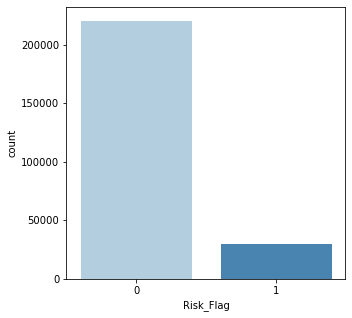

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["Risk_Flag"], palette = 'Blues', edgecolor = 'w')

In [ ]:
NaN = df.isnull().sum()/df.shape[0]*100
NaN.round(1)

Id                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Married/Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64

No missing values in our dataset.

Describe numerical variables

In [ ]:
df.describe() 

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

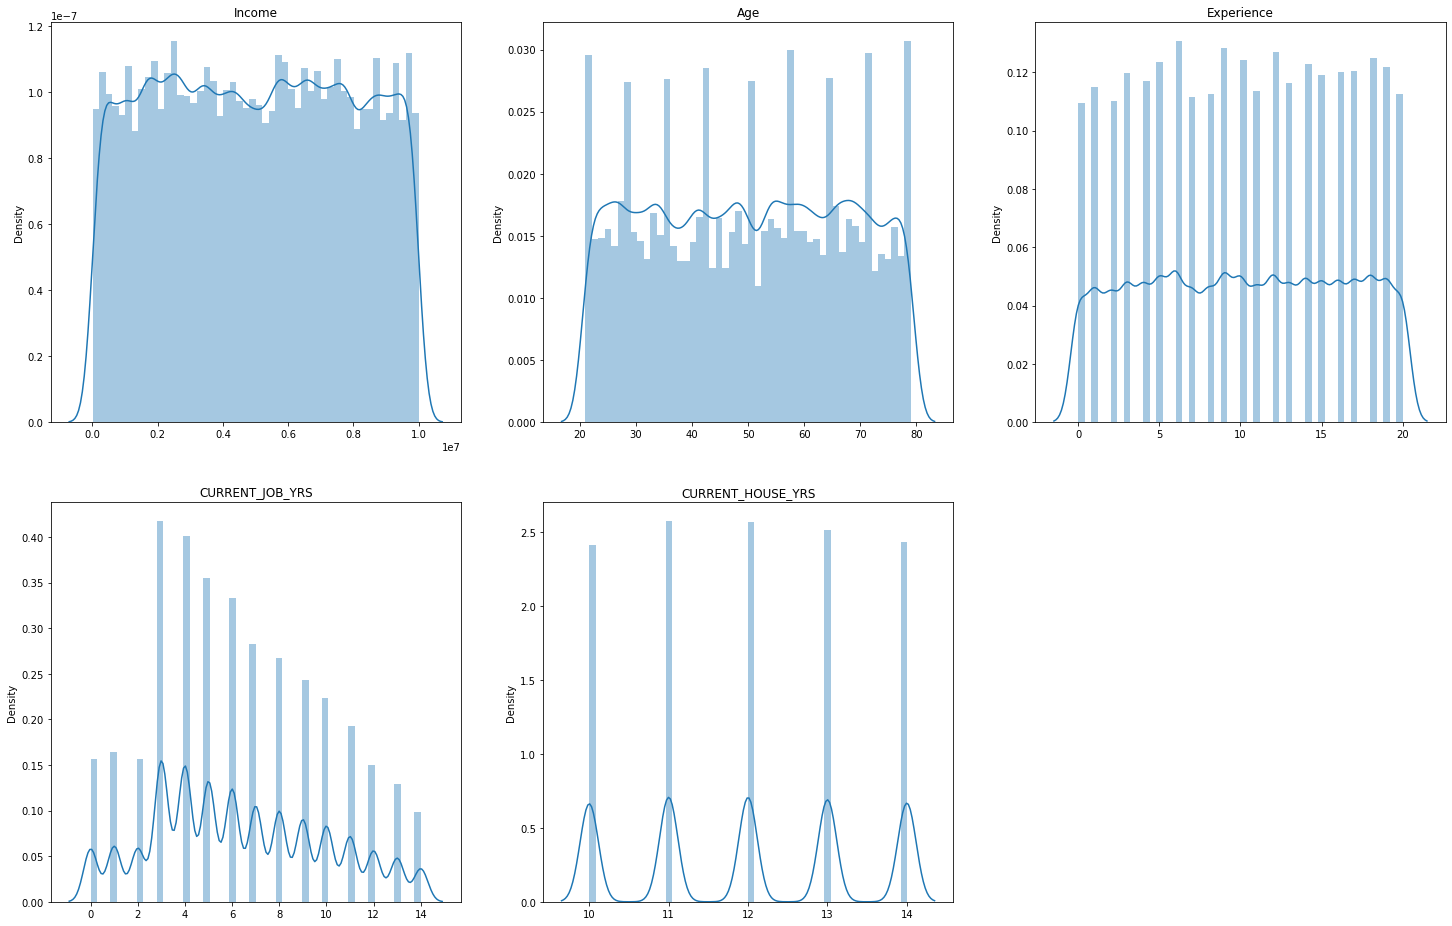

In [ ]:
numerical_columns = pd.DataFrame(df[df.select_dtypes(include=['float', 'int']).columns])
numerical_columns.columns
numerical_columns_hist = numerical_columns.drop(['Risk_Flag','Id'], axis=1)
plt.figure(figsize = (25, 25))
for i in enumerate(numerical_columns_hist):
    plt.subplot(3, 3,i[0]+1)
    sns.distplot(df, x = df[i[1]])
    plt.title(i[1])

Describe categorical variables

In [ ]:
df.describe(include=['O'])

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [ ]:
df.duplicated().sum()

0

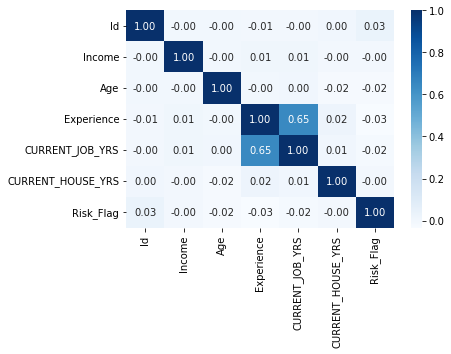

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f'); 

Current job years and experience are highly correlated.

Income

In [ ]:
df.groupby("Profession")["Income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False).head(5)

,min,max,mean
Profession,,,
Petroleum_Engineer,22921,9968353,5.443310e+06
Psychologist,33224,9985964,5.357795e+06
Designer,12841,9996946,5.336802e+06
Scientist,13792,9975985,5.282710e+06
Surgeon,18215,9995445,5.235359e+06


Generate boxplots to identify possible outliers.

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

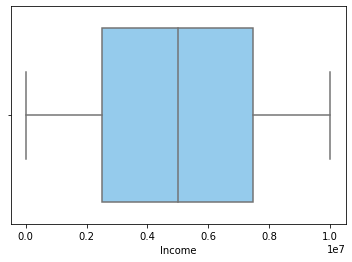

In [ ]:
sns.boxplot(df.Income, color='lightskyblue')

Age

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

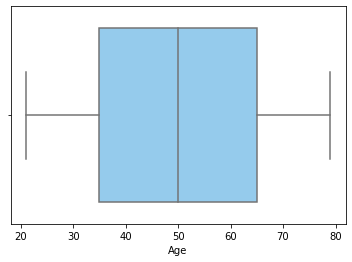

In [ ]:
sns.boxplot(df.Age, color='lightskyblue')

Experience

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience'>

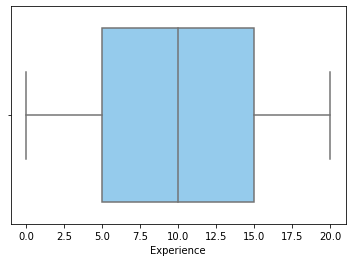

In [ ]:
sns.boxplot(df.Experience, color='lightskyblue')

Current Job Years

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CURRENT_JOB_YRS'>

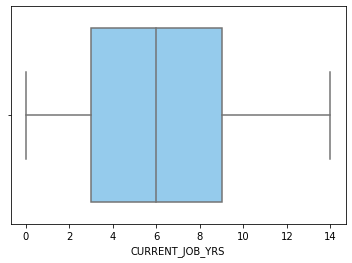

In [ ]:
sns.boxplot(df.CURRENT_JOB_YRS, color='lightskyblue')

Current House Years

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CURRENT_HOUSE_YRS'>

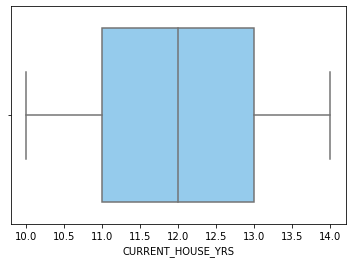

In [ ]:
sns.boxplot(df.CURRENT_HOUSE_YRS, color='lightskyblue')

No outliers no remove in our dataset.

Married/Single

In [ ]:
df["Married/Single"].value_counts()


single     226272
married     25728
Name: Married/Single, dtype: int64

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

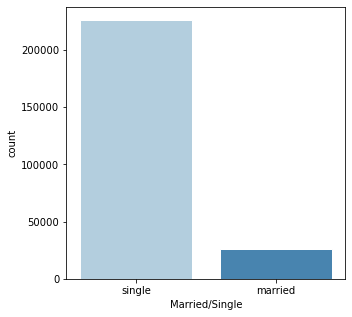

In [ ]:
# ax = df["Married/Single"].value_counts(normalize=True).plot(kind="bar")
# plt.title('Ratio of Married vs Single')
# ax.bar_label(ax.containers[0], fmt="%.3f");

plt.figure(figsize=(5,5))
sns.countplot(x=df["Married/Single"], palette = 'Blues', edgecolor = 'w')


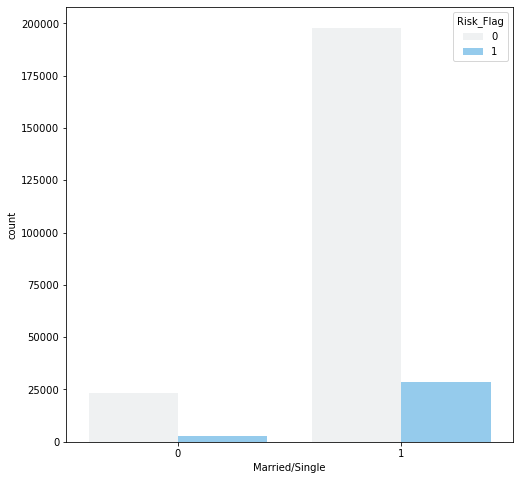

In [ ]:
plt.figure(figsize=[8,8])
sns.countplot(x = 'Married/Single', hue= 'Risk_Flag', data=df, color='lightskyblue');

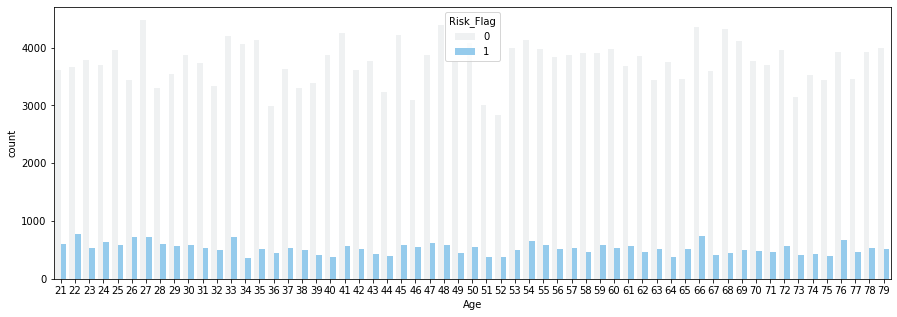

In [ ]:
plt.figure(figsize=[15,5])
sns.countplot(x = 'Age', hue= 'Risk_Flag', data=df, color='lightskyblue');

In [ ]:
df["House_Ownership"].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

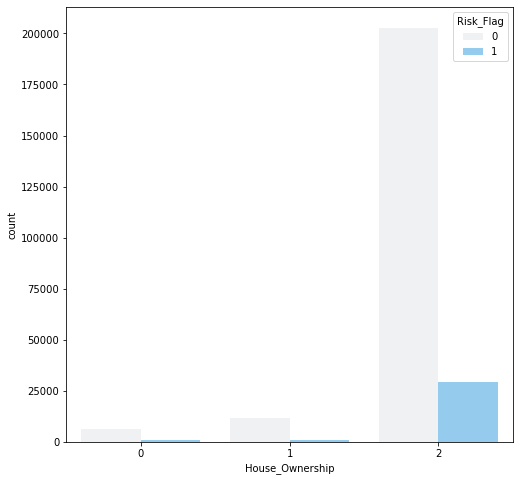

In [ ]:
plt.figure(figsize=[8,8])
sns.countplot(x = 'House_Ownership', hue= 'Risk_Flag', data=df, color='lightskyblue');

Correlations

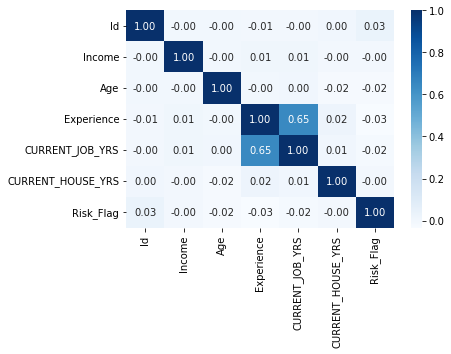

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f'); 

## Pre-processing

In [ ]:
list_object = df.select_dtypes("object").columns.tolist()
encoder = LabelEncoder()

for col in list_object:
    df[col] = encoder.fit_transform(df[col].values.tolist())

df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


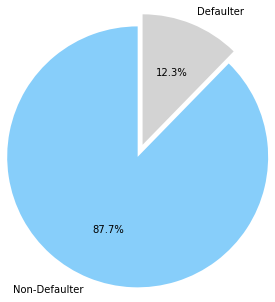

In [ ]:
df_pie = df.groupby('Risk_Flag')['Risk_Flag'].count()
# plt.pie(df_pie, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True);

labels = labels=['Non-Defaulter', 'Defaulter']
colors = ['lightskyblue', 'lightgrey']
plt.pie(df_pie, explode=[0.05, 0.1], labels= labels, colors=colors, radius=1.5, startangle=90, autopct='%.1f%%')
plt.show()

Class 0 (Non-defaulter) represents 88.00% of the dataset, while class 1 (Defaulter) only 12.00%. The classes are heavily imbalanced.

There's also a strong correlation between Experience and CURRENT_JOB_YRS. May be worth considering droping one of these variables.

We have performed random under-sampling:
Considering that we have highly skewed classes, we have shuffled the data before creating the subsamples.

https://www.kaggle.com/code/aakashjoshi123/sampling-methods-for-imbalanced-data

Over Sampling with SMOTE

In [ ]:
dummy_df_none = df.drop(["CITY", "STATE"], axis=1)
dummy_df_none = pd.get_dummies(dummy_df_none, drop_first=True)

In [ ]:
X =dummy_df_none.drop("Risk_Flag" , axis = 1)
y = dummy_df_none["Risk_Flag"]

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm , y_sm  = smote.fit_resample(X , y)

## Modelling, Scoring and Valuation

True Positive (TP): our model predicted a high probability of loan default, and it would be a default;

True Negative (TN): our model predicted that the operation has a low risk and it had a low risk;

False Positive (FP): our model predicted RISK, and it hasn't happened a loan default;

False Negative (FN): our model predicted NO RISK, and the operation was RISK <--- Worst case scenario.

In [ ]:
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size = 0.2)

In [ ]:
print('The train dataset has {} data\nThe test dataset has {} data'.
      format(X_train.shape[0], X_test.shape[0]))

The train dataset has 353606 data
The test dataset has 88402 data


Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
accuracy_train = LR.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, LR.predict(X_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Logistic Regression Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 61.28%
Logistic Regression Accuracy: 61.39%


Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
accuracy_train = decision_tree.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, decision_tree.predict(X_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Decision Tree Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 100.00%
Decision Tree Accuracy: 84.83%


Naive Bayes

In [ ]:
nBayes = GaussianNB()
nBayes = nBayes.fit(X_train, y_train)
accuracy_train = nBayes.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, nBayes.predict(X_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Naive Bayes Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 63.09%
Naive Bayes Accuracy: 63.43%


SVM (not viable / takes too long)

In [ ]:
# svc = SVC()
# svc = svc.fit(X_train, y_train)
# accuracy_train = svc.score(X_train, y_train)
# accuracy_test = accuracy_score(y_test, svc.predict(X_test))
# print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
# print ("SVM Accuracy: %.2f%%" % (accuracy_test*100))

Random Forest

In [ ]:
random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train, y_train)
accuracy_train = random_forest.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, random_forest.predict(X_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Random Forest Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 100.00%
Random Forest Accuracy: 92.10%


# Additional Performance metrics
Random Forest

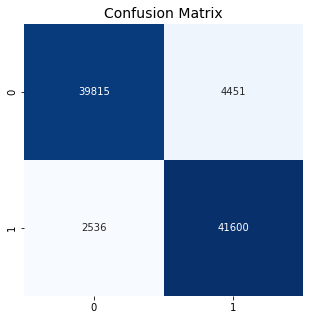

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,random_forest.predict(X_test)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [ ]:
accuracy = accuracy_score(y_test, random_forest.predict(X_test))
precision = precision_score(y_test, random_forest.predict(X_test))
recall = recall_score(y_test, random_forest.predict(X_test))
fscore = f1_score(y_test, random_forest.predict(X_test))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 92.10%
Precision test data: 90.33%
Recall test data: 94.25%
F1_score test data: 92.25%


Decision Tree

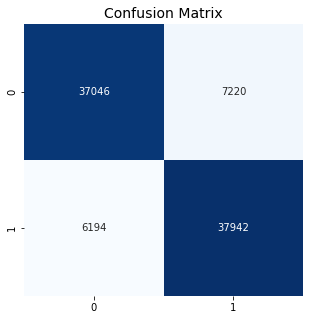

In [ ]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,decision_tree.predict(X_test)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [ ]:
accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
precision = precision_score(y_test, decision_tree.predict(X_test))
recall = recall_score(y_test, decision_tree.predict(X_test))
fscore = f1_score(y_test, decision_tree.predict(X_test))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 84.83%
Precision test data: 84.01%
Recall test data: 85.97%
F1_score test data: 84.98%


We have achieved better results using the RandomForestClassifier algorithm, but it takes considerably longer time.